<a href="https://colab.research.google.com/github/AmiraAlaa3/Predict_customer_segment_Competition/blob/main/Predict_customer_segment_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
missingValues = [""," "]
data = pd.read_csv("/content/train.csv", encoding= 'unicode_escape',na_values=missingValues)
test = pd.read_csv("/content/test.csv", encoding= 'unicode_escape',na_values=missingValues)

In [ ]:
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,10497,Male,Yes,33,No,Engineer,0.0,Average,2.0,Cat_6,B
1,5748,Female,No,42,Yes,Doctor,5.0,Low,1.0,Cat_6,B
2,4228,Male,Yes,80,No,Executive,0.0,High,2.0,Cat_6,A
3,10369,Female,Yes,66,Yes,Artist,0.0,Average,3.0,Cat_6,C
4,10442,Female,Yes,39,Yes,Healthcare,8.0,High,2.0,Cat_1,D
...,...,...,...,...,...,...,...,...,...,...,...
7160,9473,Male,Yes,42,Yes,Artist,0.0,Average,5.0,Cat_6,C
7161,8297,Male,Yes,48,Yes,Artist,0.0,Average,2.0,Cat_6,C
7162,9246,Female,Yes,51,Yes,Artist,8.0,Average,2.0,Cat_6,C
7163,3771,Female,Yes,25,No,Engineer,2.0,Low,2.0,Cat_6,A


In [ ]:
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,755,Female,Yes,37,No,Engineer,1.0,Average,6.0,Cat_4
1,4670,Female,No,21,No,Healthcare,2.0,Low,3.0,Cat_6
2,287,Male,No,38,Yes,Artist,NaN,Low,1.0,Cat_6
3,1142,Male,No,26,Yes,Healthcare,0.0,Low,2.0,Cat_3
4,6583,Male,Yes,68,Yes,Lawyer,0.0,Low,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...
3525,4323,Male,Yes,79,Yes,Artist,NaN,High,2.0,Cat_6
3526,3776,Male,Yes,40,Yes,Entertainment,1.0,Average,2.0,Cat_3
3527,6697,Male,Yes,73,Yes,Artist,5.0,High,3.0,Cat_6
3528,3431,Male,No,20,No,Healthcare,NaN,Low,5.0,Cat_3


In [ ]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,7165.000000,7165.000000,6440.000000,6864.000000
mean,5316.277599,43.623308,2.610559,2.834062
std,3093.800779,16.842847,3.387930,1.538093
min,1.000000,18.000000,0.000000,1.000000
25%,2634.000000,30.000000,0.000000,2.000000
50%,5320.000000,41.000000,1.000000,2.000000
75%,8009.000000,53.000000,4.000000,4.000000
max,10694.000000,89.000000,14.000000,9.000000


In [ ]:
missing={"missing":data.isnull().sum()," % of missing":round(((data.isnull().sum()/data.shape[0])*100),2)}
pd.DataFrame(missing)

,missing,% of missing
ID,0,0.00
Gender,0,0.00
Ever_Married,121,1.69
Age,0,0.00
Graduated,69,0.96
Profession,105,1.47
Work_Experience,725,10.12
Spending_Score,0,0.00
Family_Size,301,4.20
Var_1,64,0.89


In [ ]:
missing={"missing":test.isnull().sum()," % of missing":round(((test.isnull().sum()/test.shape[0])*100),2)}
pd.DataFrame(missing)

,missing,% of missing
ID,0,0.00
Gender,0,0.00
Ever_Married,69,1.95
Age,0,0.00
Graduated,33,0.93
Profession,57,1.61
Work_Experience,373,10.57
Spending_Score,0,0.00
Family_Size,147,4.16
Var_1,44,1.25


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7165 non-null   int64  
 1   Gender           7165 non-null   object 
 2   Ever_Married     7044 non-null   object 
 3   Age              7165 non-null   int64  
 4   Graduated        7096 non-null   object 
 5   Profession       7060 non-null   object 
 6   Work_Experience  6440 non-null   float64
 7   Spending_Score   7165 non-null   object 
 8   Family_Size      6864 non-null   float64
 9   Var_1            7101 non-null   object 
 10  Segmentation     7165 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 615.9+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


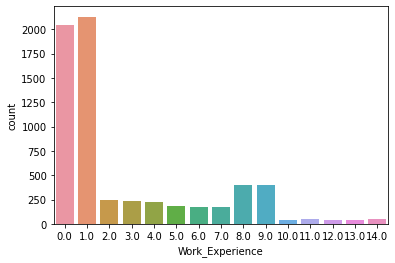

In [ ]:
sns.countplot(data['Work_Experience'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


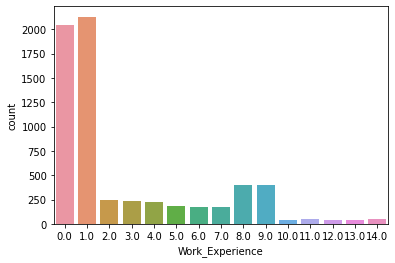

In [ ]:
sns.countplot(data['Work_Experience'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


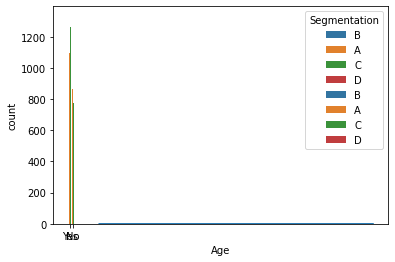

In [ ]:

sns.countplot(data['Gender'],hue=data['Segmentation'])
sns.countplot(data['Ever_Married'],hue=data['Segmentation'])
sns.distplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


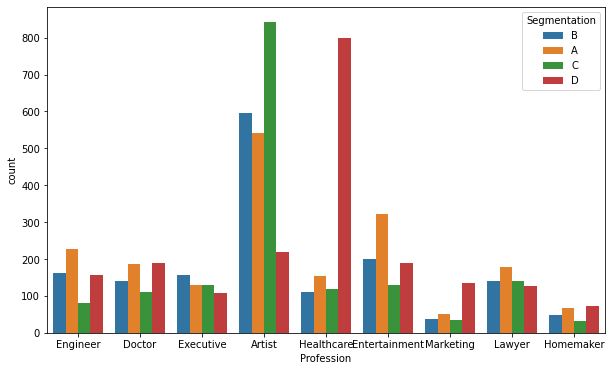

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.countplot(data['Profession'],hue=data['Segmentation'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


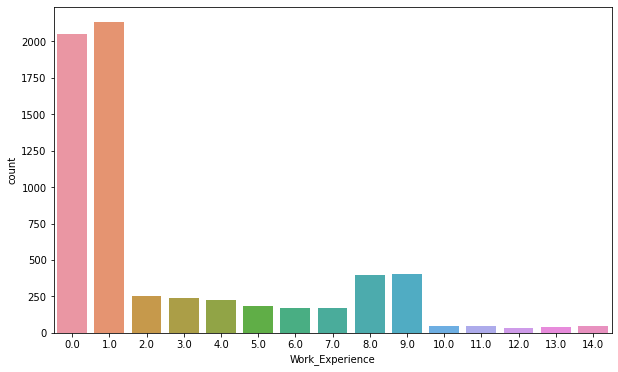

In [ ]:
sns.countplot(data['Work_Experience'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


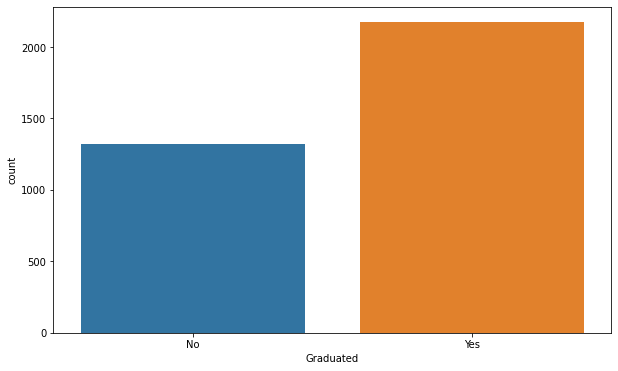

In [ ]:
sns.countplot(test['Graduated'])

In [ ]:
data['Ever_Married']=data['Ever_Married'].fillna('Yes')
test['Ever_Married']=test['Ever_Married'].fillna('Yes')

In [ ]:

meann= test["Work_Experience"].mean()
test["Work_Experience"].fillna(meann,inplace=True)
#cat1   then 4
data['Var_1'].fillna('Cat_1',inplace=True)
test['Var_1'].fillna('Cat_1',inplace=True)

In [ ]:
meann= data["Family_Size"].mean()
data["Family_Size"].fillna(meann,inplace=True)
meann= test["Family_Size"].mean()
test["Family_Size"].fillna(meann,inplace=True)

In [ ]:
data['Gender'] =  data['Gender'].map({'Female': 1,'Male':0})
test['Gender'] =  test['Gender'].map({'Female': 1,'Male':0})

data['Ever_Married'] =  data['Ever_Married'].map({'Yes': 1,'No':0})
test['Ever_Married'] =  test['Ever_Married'].map({'Yes': 1,'No':0})

data['Graduated'] =  data['Graduated'].map({'Yes': 1,'No':0})
test['Graduated'] =  test['Graduated'].map({'Yes': 1,'No':0})

data['Spending_Score'] =  data['Spending_Score'].map({'Average': 1,'Low':0 ,'High':2})
test['Spending_Score'] =  test['Spending_Score'].map({'Average': 1,'Low':0 ,'High':2})

data['Segmentation'] = data['Segmentation'].map({'A': 1,'B':0 ,'C':2 ,'D':3})
data.duplicated().value_counts()

False    7165
dtype: int64

In [ ]:
# i tried to wite all features here but the same score
from sklearn.preprocessing import LabelEncoder
cat_cols = ['Profession','Var_1']
enc = LabelEncoder()

for col in cat_cols:
    data[col] = data[col].astype('str')
    test[col] = test[col].astype('str')
    data[col] = enc.fit_transform(data[col])
    test[col] = enc.transform(test[col])

In [ ]:

meann= data["Graduated"].median()
data["Graduated"].fillna(meann,inplace=True)
meann= test["Graduated"].median()
test["Graduated"].fillna(meann,inplace=True)

meann= data["Profession"].mean()
data["Profession"].fillna(meann,inplace=True)
meann= test["Profession"].mean()
test["Profession"].fillna(meann,inplace=True)

In [ ]:
Work_Experience_nan_1 = data.query('Segmentation == 1')['Work_Experience'][data['Work_Experience'].isna()].index
data.loc[Work_Experience_nan_1,'Work_Experience'] =data.query('Segmentation == 1')['Work_Experience'][data['Work_Experience'].notna()].mean()

Work_Experience_nan_0 = data.query('Segmentation == 0')['Work_Experience'][data['Work_Experience'].isna()].index
data.loc[Work_Experience_nan_0,'Work_Experience'] = data.query('Segmentation == 0')['Work_Experience'][data['Work_Experience'].notna()].mean()

Work_Experience_nan_1 = data.query('Segmentation == 2')['Work_Experience'][data['Work_Experience'].isna()].index
data.loc[Work_Experience_nan_1,'Work_Experience'] =data.query('Segmentation == 2')['Work_Experience'][data['Work_Experience'].notna()].mean()

Work_Experience_nan_0 = data.query('Segmentation == 3')['Work_Experience'][data['Work_Experience'].isna()].index
data.loc[Work_Experience_nan_0,'Work_Experience'] = data.query('Segmentation == 3')['Work_Experience'][data['Work_Experience'].notna()].mean()

In [ ]:
data=data.set_index("ID")
test=test.set_index("ID")
index=test.index

In [ ]:
data.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
test.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [ ]:
print(np.intersect1d(data.index, test.index).shape[0]/data.index.nunique())
common_ids = len(set(test.index.unique()).intersection(set(data.index.unique())))
print("Common IDs : ",common_ids)


0.0
Common IDs :  0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X=data.drop(["Segmentation"],axis=1)
y=data["Segmentation"]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0, train_size = 0.7)

clf = RandomForestClassifier( max_depth = 20, n_estimators = 500,min_samples_leaf=4,min_samples_split=30,random_state=40)

clf.fit(X_train,y_train)
y_pred = clf.predict(test)
    
print('Accuracy on training set: {:.6f}'.format(clf.score(X_train, y_train)))  

#Accuracy on training set: 0.590030   scored 0.49518


#Accuracy on training set: 0.622532     scored 0.49688

Accuracy on training set: 0.967498


In [ ]:
import xgboost as xgb
X=data.drop(["Segmentation"],axis=1)
y=data["Segmentation"]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0, train_size = 0.7)

xg_reg = xgb.XGBClassifier(objective ='multi:softmax',num_class=4,  learning_rate = 0.1,
                max_depth = 3,alpha = 2, n_estimators = 200,min_samples_leaf=4,min_samples_split=2,random_state=0)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(test)
print("Testing score: ",xg_reg.score(X_test, y_test))      
print('Accuracy on training set: {:.6f}'
     .format(xg_reg.score(X_train, y_train)))  

#Testing score:  0.4790697674418605           
#Accuracy on training set: 0.514457


Testing score:  0.5283720930232558
Accuracy on training set: 0.588435


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X=data.drop(["Segmentation"],axis=1)
y=data["Segmentation"]

Xtrain, Xtest, y_train, y_test = train_test_split(X, y,random_state = 0, train_size = 0.7)

#X, y = make_classification(n_features=9, random_state=0)
clf = ExtraTreesClassifier(n_estimators=100, max_depth=20,min_samples_leaf=5,min_samples_split=18,random_state=0)
clf.fit(Xtrain, y_train)

y_pred = clf.predict(test)
print("Testing score: ",clf.score(Xtest, y_test))      
print('Accuracy on training set: {:.6f}'
     .format(clf.score(Xtrain, y_train)))  
#Testing score:  0.46837209302325583
#Accuracy on training set: 0.668195      
   
#Testing score:  0.47069767441860466
#Accuracy on training set: 0.647059

Testing score:  0.4744186046511628
Accuracy on training set: 0.594217


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
X=data.drop(["Segmentation"],axis=1)
y=data["Segmentation"]
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8 ,random_state=42)

clf = GradientBoostingClassifier(n_estimators=60, learning_rate=1.0,
   max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(test)   
print("Testing score: ",clf.score(X_test, y_test))     
print('Accuracy on training set: {:.6f}'
     .format(clf.score(X_train, y_train)))             
  
#Testing score:  0.4640614096301465
#Accuracy on training set: 0.541172



Testing score:  0.5157013258897418
Accuracy on training set: 0.596825


In [ ]:
X=data.drop(["Segmentation"],axis=1)
y=data["Segmentation"]

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42, train_size = 0.8)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)#
X_test = sc.transform(X_test)

logi = LogisticRegression()
logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
print("Testing score: ",logi.score(X_test, y_test))        #testing was 0.452896 then 0.4577808792742498
print('Accuracy on training set: {:.6f}'
     .format(logi.score(X_train, y_train))) 
#knn.score(Xtest, y_pred)

Testing score:  0.4424284717376134
Accuracy on training set: 0.454117


In [ ]:
#Do not run again not a good accuracy$$$ logistic:0.43  knn:0.40
X=data.drop(["Segmentation"],axis=1)
y=data["Segmentation"]

Xtrain, Xtest, y_train, y_test = train_test_split(X, y,random_state = 42, train_size = 0.7)

knn = KNeighborsClassifier()
knn.fit(Xtrain, y_train)
y_pred = knn.predict(test)
#knn.score(Xtest, y_pred)

In [ ]:
#do not run 0.43569 score when logistic gave 0.44
from lightgbm  import LGBMClassifier
X=data.drop(["Segmentation"],axis=1)
y=data["Segmentation"]

Xtrain, Xtest, y_train, y_test = train_test_split(X, y,random_state = 42, train_size = 0.8)

lgb_model = LGBMClassifier(
                                   boosting_type='gbdt', 
                                   max_depth=15, 
                                   learning_rate=0.15, 
                                   objective='multiclass', # Multi Class Classification
                                   random_state=42,  
                                   n_estimators=1000 ,
                                   reg_alpha=0, 
                                   reg_lambda=1, 
                                   n_jobs=-1
                                 )
lgb_model.fit(Xtrain,y_train)
y_pred = lgb_model.predict(test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=60,random_state=0)

X=data.drop(["Segmentation"],axis=1)
y=data["Segmentation"]

Xtrain, Xtest, y_train, y_test = train_test_split(X, y,random_state = 0, train_size = 0.7)

#X, y = make_classification(n_features=9, random_state=0)
#clf = ExtraTreesClassifier(n_estimators=100, max_depth=20,min_samples_leaf=5,min_samples_split=18,random_state=0)
clf.fit(Xtrain, y_train)

y_pred = clf.predict(test)
print("Testing score: ",clf.score(Xtest, y_test))      
print('Accuracy on training set: {:.6f}'
     .format(clf.score(Xtrain, y_train)))  

In [ ]:
from lightgbm import LGBMClassifier
neigh = LGBMClassifier(boosting_type='gbdt', num_leaves=30,
                                learning_rate=0.1, max_depth=15,n_estimators=60,
                                feature_fraction=0.9, reg_lambda=0.4,random_state=1)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(test)
print('Accuracy of K-NN classifier on training set: {:.6f}'
     .format(neigh.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.6f}'
     .format(neigh.score(X_test, y_test)))

#Accuracy  classifier on training set: 0.600598       scored:0.49631
#Accuracy classifier on test set: 0.480465

Accuracy of K-NN classifier on training set: 0.639083
Accuracy of K-NN classifier on test set: 0.536744


In [ ]:
#y_pred = y_pred.map({'A': 1,'B':0 ,'C':2 ,'D':3})
new_arr=['']*(len(y_pred))
for i in range(len(y_pred)):
  if(y_pred[i]==1):
    new_arr[i]='A'
  elif(y_pred[i]==0):
    new_arr[i]='B'
  elif(y_pred[i]==2):
    new_arr[i]='C'
  else:
    new_arr[i]='D'      

In [ ]:
result=pd.DataFrame({"ID":index,"Segmentation":new_arr})
result=result.set_index("ID")
result.to_csv('Result1.csv')

In [ ]:
x=data.drop(["Segmentation"],axis=1)
y=data["Segmentation"]

X_train, X_test,y_train,y_test = train_test_split(x,y,train_size = 0.7 ,random_state=42)

knn = KNeighborsClassifier(algorithm= 'brute',n_neighbors=4,leaf_size=70)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
neigh = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='auto', leaf_size=30, p=4, metric='euclidean', metric_params=None, n_jobs=None)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(test)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(neigh.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(neigh.score(X_test, y_test)))
#print(classification_report(y_test,pred))
#print(confusion_matrix(y_test,pred))

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

seed = 3
#MODELS
models = []
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('LGBMClassifier',LGBMClassifier(n_estimators=60)))
models.append(('GradientBoostingClassifier',GradientBoostingClassifier(n_estimators=60)))

In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)